In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Remove Missing Data

In [2]:
df = pd.read_csv('datasets/data_science_job.csv')

In [3]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0


In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
col = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

In [10]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
len(df[col].dropna())/len(df)

0.8968577095730244

In [13]:
new_df = df[col].dropna()

In [14]:
new_df.shape

(17182, 5)

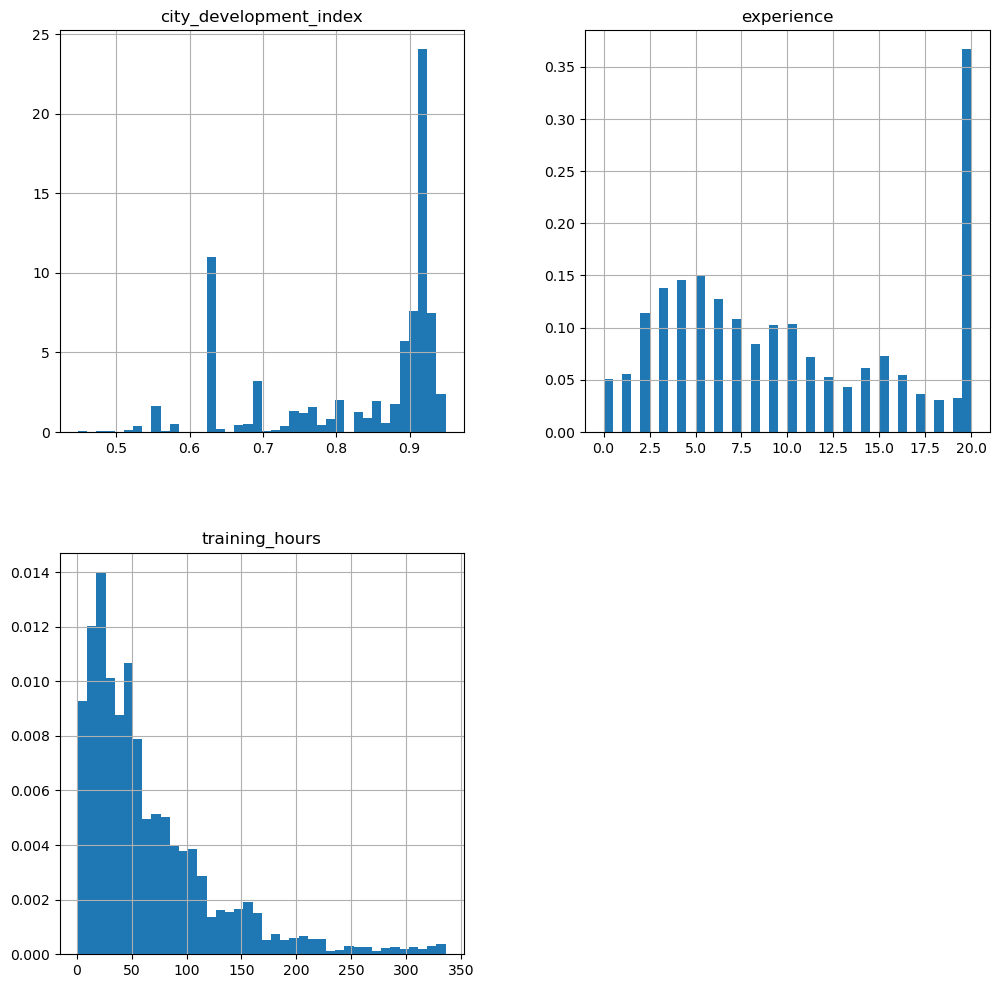

In [15]:
new_df.hist(bins=40,density=True, figsize=(12,12))
plt.show()

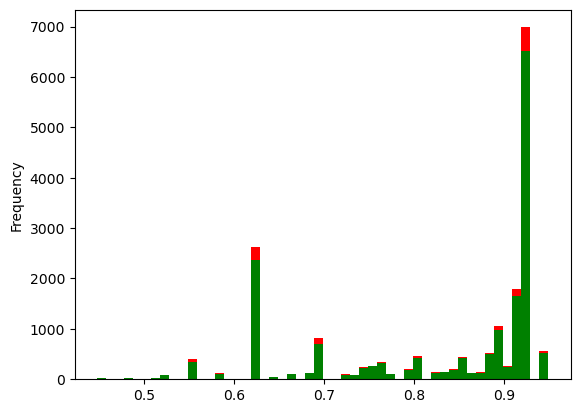

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

df['city_development_index'].plot.hist(bins=50, color='r')
new_df['city_development_index'].plot.hist(bins=50, color='g')
plt.show()

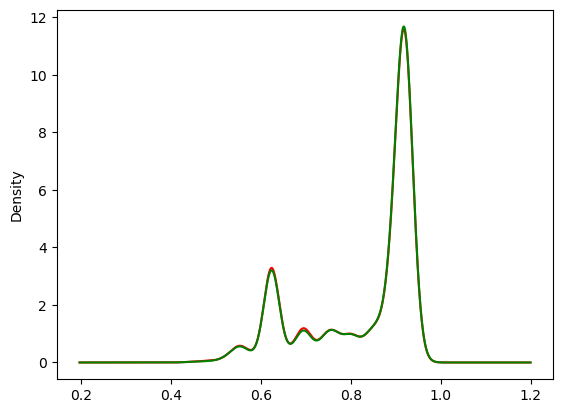

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

df['city_development_index'].plot.density(color='r')
new_df['city_development_index'].plot.density(color='g')
plt.show()

In [18]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

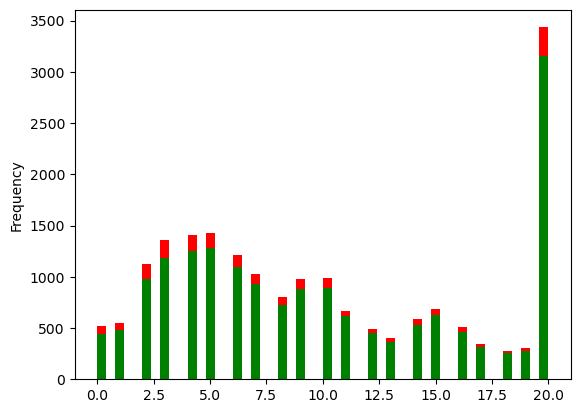

In [21]:
fig = plt.figure()
ax = fig.add_subplot()

df['experience'].plot.hist(bins=50, color='r')
new_df['experience'].plot.hist(bins=50, color='g')
plt.show()

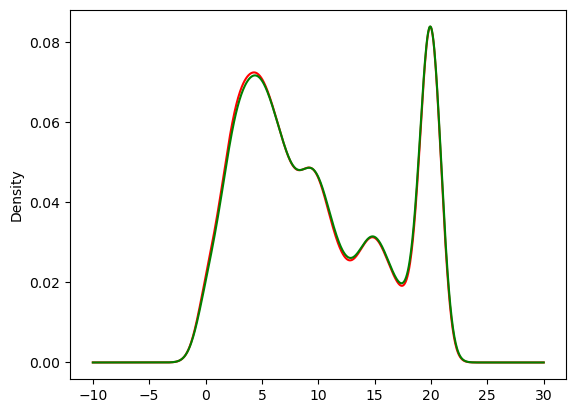

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

df['experience'].plot.density(color='r')
new_df['experience'].plot.density(color='g')
plt.show()

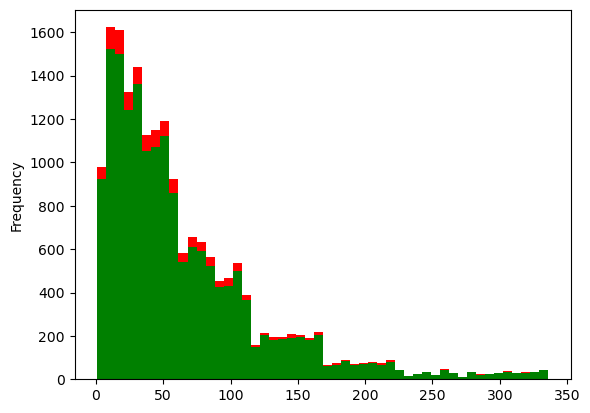

In [22]:
fig = plt.figure()
ax = fig.add_subplot()

df['training_hours'].plot.hist(bins=50, color='r')
new_df['training_hours'].plot.hist(bins=50, color='g')
plt.show()

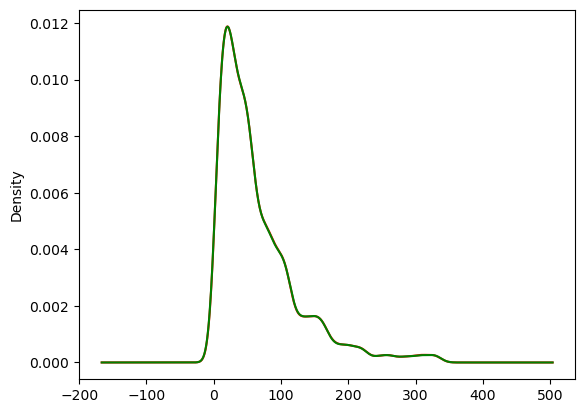

In [20]:
fig = plt.figure()
ax = fig.add_subplot()

df['training_hours'].plot.density(color='r')
new_df['training_hours'].plot.density(color='g')
plt.show()

In [23]:
 temp = pd.concat([
     df['enrolled_university'].value_counts()/len(df),
     new_df['enrolled_university'].value_counts()/len(new_df)
 ],axis=1)
temp.columns = ['original','cca']
    

In [24]:
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [25]:
 temp = pd.concat([
     df['education_level'].value_counts()/len(df),
     new_df['education_level'].value_counts()/len(new_df)
 ],axis=1)
temp.columns = ['original','cca']
    

In [26]:
temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
